In [2]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import os
for dirname, _, filenames in os.walk('emails.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import multiprocessing
import seaborn as sns
import email
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("emails.csv")
# view first 5 rows of the dataset
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
# a sample email
print(df.loc[1]['message'])
# get shape of the data
df.shape

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

(517401, 2)

In [5]:
# transform the email into a list format to make columns
message = df.loc[1]['message']
e = email.message_from_string(message)
e.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [6]:
# get date test
e.get('Date')

'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [7]:
# show message body test
e.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

# This Python function,  get_field
is designed to extract a specific field from a list of email messages and return the values of that field for each message as a list.

In [8]:
# now we add those fields into our 'df' dataframe
def get_field(field, messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get(field))
    return column
df['date'] = get_field("Date", df['message'])
df['subject'] = get_field("Subject", df['message'])
df['X-Folder'] = get_field("X-Folder", df['message'])
df['X-From'] = get_field("X-From", df['message'])
df['X-To'] = get_field("X-To", df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall


In [13]:
def body(messages):
    column = []
    for message in messages:
        e = email.message_from_string(message)
        column.append(e.get_payload())
    return column

df['body'] = body(df['message'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,employee,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,allen-p,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,allen-p,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,allen-p,test successful. way to go!!!


In [14]:
def employee(file):
    column = []
    for string in file:
        column.append(string.split("/")[0])
    return column

df['employee'] = employee(df['file'])
df.head(3)

,file,message,date,subject,X-Folder,X-From,X-To,employee,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,allen-p,Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,allen-p,Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Phillip K Allen,Leah Van Arsdall,allen-p,test successful. way to go!!!


In [15]:
top_10 = pd.DataFrame(df['employee'].value_counts()[:10])
top_10.reset_index(inplace=True)
top_10.columns = ["Employee_name", "Counts"]
top_10

,Employee_name,Counts
0,kaminski-v,28465
1,dasovich-j,28234
2,kean-s,25351
3,mann-k,23381
4,jones-t,19950
5,shackleton-s,18687
6,taylor-m,13875
7,farmer-d,13032
8,germany-c,12436
9,beck-s,11830


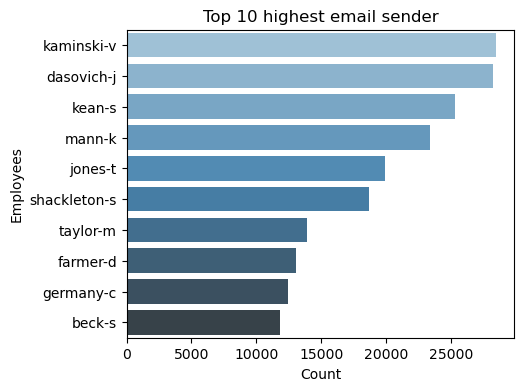

In [16]:
plt.figure(figsize=(5,4))

sns.barplot(y="Employee_name", x="Counts", data=top_10, palette="Blues_d")
plt.title("Top 10 highest email sender")
plt.xlabel("Count")
plt.ylabel("Employees")
plt.show()

In [17]:
# Preprocess the data
nltk.download('wordnet')
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercasing
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub('[^a-z]', ' ', text)
    # Lemmatization and stopword removal
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(words)

df['processed_body'] = df['body'].apply(preprocess)

# Apply TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
tfidf_matrix = vectorizer.fit_transform(df['processed_body'])

# Spam/Ham Classification (Simple Heuristic) 
def classify_email(text):
    # Example heuristic: classify based on specific keywords
    spam_keywords = ['free', 'offer', 'winner', 'urgent', 'money']
    if any(keyword in text for keyword in spam_keywords):
        return 'spam'
    return 'ham'

df['label'] = df['processed_body'].apply(classify_email)

# The DataFrame now has a new column 'label' with 'spam' or 'ham'
print(df.head())

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vedan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                       file  \
0     allen-p/_sent_mail/1.   
1    allen-p/_sent_mail/10.   
2   allen-p/_sent_mail/100.   
3  allen-p/_sent_mail/1000.   
4  allen-p/_sent_mail/1001.   

                                             message  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...   
1  Message-ID: <15464986.1075855378456.JavaMail.e...   
2  Message-ID: <24216240.1075855687451.JavaMail.e...   
3  Message-ID: <13505866.1075863688222.JavaMail.e...   
4  Message-ID: <30922949.1075863688243.JavaMail.e...   

                                    date    subject  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)              
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)        Re:   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)   Re: test   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)              
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  Re: Hello   

                                            X-Folder           X-From  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Phillip K Allen   

In [18]:
# Group by 'employee' and count the number of 'ham' and 'spam'
email_counts = df.groupby(['employee', 'label']).size().unstack(fill_value=0)

# Calculate top 10 ham and top 10 spam accounts
top_10_ham = email_counts['ham'].nlargest(10)
top_10_spam = email_counts['spam'].nlargest(10)

print("Top 10 Ham Accounts:\n", top_10_ham)
print("\nTop 10 Spam Accounts:\n", top_10_spam)

Top 10 Ham Accounts:
 employee
kaminski-v      22320
mann-k          21153
dasovich-j      20895
kean-s          19579
jones-t         18218
shackleton-s    15840
farmer-d        11729
taylor-m        11385
germany-c       11225
beck-s          10264
Name: ham, dtype: int64

Top 10 Spam Accounts:
 employee
dasovich-j      7339
kaminski-v      6145
kean-s          5772
shackleton-s    2847
taylor-m        2490
lay-k           2267
bass-e          2237
mann-k          2228
scott-s         1986
jones-t         1732
Name: spam, dtype: int64


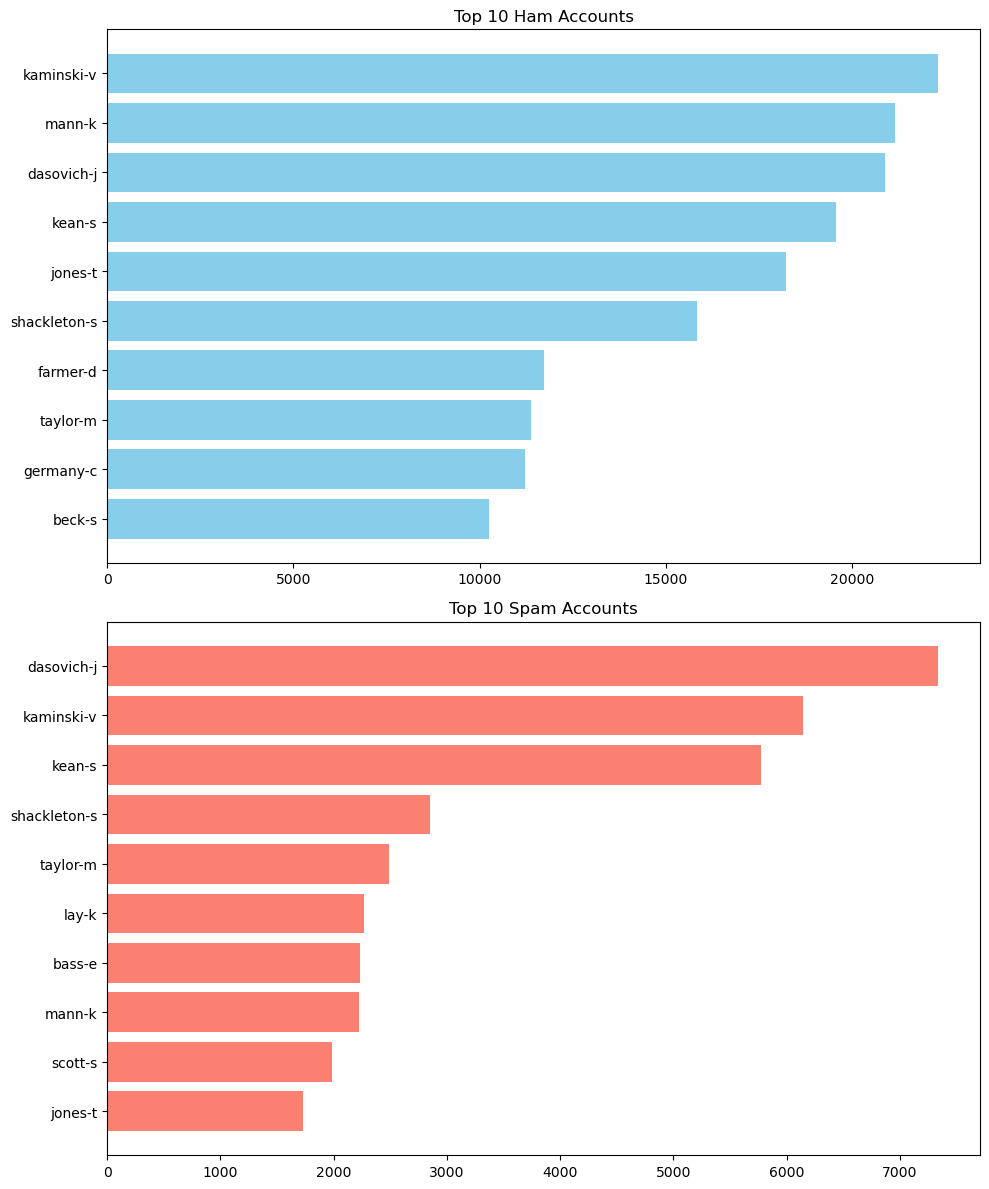

In [21]:
import matplotlib.pyplot as plt

# Data from your output
top_10_ham = {
    'kaminski-v': 22320,
    'mann-k': 21153,
    'dasovich-j': 20895,
    'kean-s': 19579,
    'jones-t': 18218,
    'shackleton-s': 15840,
    'farmer-d': 11729,
    'taylor-m': 11385,
    'germany-c': 11225,
    'beck-s': 10264
}

top_10_spam = {
    'dasovich-j': 7339,
    'kaminski-v': 6145,
    'kean-s': 5772,
    'shackleton-s': 2847,
    'taylor-m': 2490,
    'lay-k': 2267,
    'bass-e': 2237,
    'mann-k': 2228,
    'scott-s': 1986,
    'jones-t': 1732
}

# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# Top 10 Ham Accounts
ham_names = list(top_10_ham.keys())
ham_values = list(top_10_ham.values())
ax[0].barh(ham_names, ham_values, color='skyblue')
ax[0].set_title('Top 10 Ham Accounts')
ax[0].invert_yaxis()  # Invert y-axis to have the highest value on top

# Top 10 Spam Accounts
spam_names = list(top_10_spam.keys())
spam_values = list(top_10_spam.values())
ax[1].barh(spam_names, spam_values, color='salmon')
ax[1].set_title('Top 10 Spam Accounts')
ax[1].invert_yaxis()  # Invert y-axis to have the highest value on top

# Adjust layout
plt.tight_layout()
plt.show()
